<a href="https://colab.research.google.com/github/nadjastojanovic/image-classification/blob/main/ImageClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Image Classification with ImageNet

You can find detailed explanations of every code block underneath it.

## Setup

There are some prerequisites for our image classification.

In [1]:
import numpy as np
import time

import PIL.Image as Image
import matplotlib.pyplot as plt

import tensorflow as tf
import tensorflow_hub as hub

from keras.preprocessing.image import load_img

When **import** is used, it searches for the module initially in the local scope by calling `__import__()` function. We can use **as** after `import module` to refer to modules with more ease.

* numpy - adds support for large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays.
* time - for time-related tasks such as telling the current time, delaying the execution of functions, and taking time since epoch and returning local time.
* PIL.Image - provides a number of factory functions such as loading images from files, and creating new images.
* matplotlib.pyplot - a collection of command style functions that make Matplotlib work like MATLAB. Each Pyplot function makes some change to a figure. For example, a function creates a figure, a plotting area in a figure, plots some lines in a plotting area, decorates the plot with labels, etc.
* tensorflow - an open source software library for high performance numerical computation. Its flexible architecture allows easy deployment of computation across a variety of platforms (CPUs, GPUs, TPUs), and from desktops to clusters of servers to mobile and edge devices.
* tensorflow_hub - a library to foster the publication, discovery, and consumption of reusable parts of machine learning models.

## An ImageNet classifier

In order to avoid the time consuming process of training a model, we are going to load a pre-trained one from TensorflowHub. 

In [2]:
classifier_model ="https://tfhub.dev/google/tf2-preview/mobilenet_v2/classification/4" 

IMAGE_SHAPE = (224, 224)

classifier = tf.keras.Sequential([
    hub.KerasLayer(classifier_model, input_shape=IMAGE_SHAPE+(3,))
])

MobileNet V4 is a family of neural network architectures for efficient on-device image classification and related tasks, originally published by Mark Sandler, Andrew Howard, Menglong Zhu, Andrey Zhmoginov, Liang-Chieh Chen. The module contains a trained instance of the network, packaged to do the image classification that the network was trained on.

Depending on the neural network used for image classification, image shapes or dimensions will vary. For MobileNet V4, the default input image size is 224x224. For Inception V3 for example, it is 299x299.

`Sequential` groups a linear stack of layers into a Keras model which we will use as our `classifier`. It takes as arguments any layers we want to add to the model, and an optional name for the model. In this case we are adding a layer to our `classifier_model` and defining the input shape as our `IMAGE_SHAPE` and we want it in color (in RGB) so we add `(3,)` to denote the three channels. 

## Run on a single image

Let's test our model on an image of a rose.

8192/6398 [======================================] - 0s 0us/step


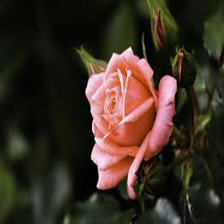

In [3]:
img_src = "https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcRxGYi3_C_92xICEsFEL68Fe5fSy99nmo4Tsw&usqp=CAU"
img = tf.keras.utils.get_file('rose', img_src)
img = Image.open(img).resize(IMAGE_SHAPE)
img

We store the url to our image in `img_src`.

In `img` we store the actual image which needs to be passed to the model. For this we use the `get_file` method from Keras which takes an argument of the image name and its url. **Note**: `get_file` downloads a file from a URL if it not already in the cache. This means that if you run the above code, change the URL and run it again you will see the same image as the first time. 

We can then open the image using the Image module and resize it to our desired dimensions.

Finally, we run `img` to check if everything is in order.

In [4]:
img = np.array(img)/255.0
img.shape

(224, 224, 3)

We now turned the image to a numpy array and we can see its dimensions.

In [5]:
result = classifier.predict(img[np.newaxis, ...])
result.shape

(1, 1001)

We add another batch dimension and our result is now a 1001 element vector of logits, rating the probability of each class for the image.

In [6]:
predicted_class = np.argmax(result[0], axis=-1)
predicted_class

997

The top class (with the highest probability in the array) can be found using `argmax`.

In [7]:
labels_path = tf.keras.utils.get_file('ImageNetLabels.txt','https://storage.googleapis.com/download.tensorflow.org/data/ImageNetLabels.txt')
imagenet_labels = np.array(open(labels_path).read().splitlines())

16384/10484 [==============================================] - 0s 0us/step


We now take the predicted class ID and fetch the ImageNet labels to decode the prediction.

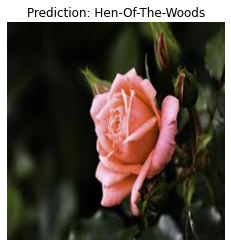

In [8]:
plt.imshow(img)
plt.axis('off')
predicted_class_name = imagenet_labels[predicted_class]
_ = plt.title("Prediction: " + predicted_class_name.title())

We plot the image using `imshow` and get rid of the axis.

The plot title is the string at index `predicted_class` in the ImageNet labels array.